In [3]:
%%html
<style>
h1 {
  border: 1.5px solid #333;
  padding: 8px 12px;
  background-color:#a0cfc0;
  position: static;
}  
h2 {
  padding: 8px 12px;
  background-color:#f0cfc0;
  position: static;
}   
h3 {
  padding: 4px 8px;
  background-color:#f0cfc0;
  position: static;
}   
</style>

# Classification à 3 classes

## 1. Génération des données : 
Création de points synthétiques pour les trois classes avec du bruit gaussien.
## 2. Fonctions d'activation : Implémentation de la sigmoïde et sa dérivée, avec protection contre l'overflow.
3. Forward propagation : Calcul des sorties des deux perceptrons en parallèle.
4. Calcul des gradients : Implémentation de la rétropropagation pour les deux perceptrons.
5. Entraînement : Boucle d'apprentissage avec mise à jour des poids par descente de gradient.
6. Prédiction et visualisation : Fonctions pour classifier les points et visualiser les frontières de décision.
7. Exécution 

In [1]:
# Étape 1: Mise en place des données et fonctions de base
import numpy as np
import matplotlib.pyplot as plt

# Génération des données d'entraînement
np.random.seed(42)

# Création de groupes de points avec du bruit gaussien
def generate_points(center_points, n_copies=5, noise=0.1):
    points = []
    for x, y in center_points:
        for _ in range(n_copies):
            points.append((
                x + np.random.normal(0, noise),
                y + np.random.normal(0, noise)
            ))
    return points

# Définition des centres pour chaque classe
blue_centers = [(1, 1), (1.5, 1.2), (2, 1)]  # Classe 0
red_centers = [(1, 3), (1.5, 3.2), (2, 3)]   # Classe 1
green_centers = [(3.5, 2), (4, 2.2), (4.5, 2)]  # Classe 2

# Génération des points pour chaque classe
blue_points = generate_points(blue_centers)
red_points = generate_points(red_centers)
green_points = generate_points(green_centers)

# Visualisation des données initiales
def plot_points():
    plt.figure(figsize=(10, 6))
    for x, y in blue_points:
        plt.scatter(x, y, color='blue', alpha=0.6)
    for x, y in red_points:
        plt.scatter(x, y, color='red', alpha=0.6)
    for x, y in green_points:
        plt.scatter(x, y, color='green', alpha=0.6)
    plt.title("Distribution des points d'entraînement")
    plt.grid(True)
    plt.show()

# Étape 2: Fonctions d'activation et leurs dérivées
def sigmoid(z):
    """Fonction d'activation sigmoïde"""
    return 1 / (1 + np.exp(-np.clip(z, -500, 500)))  # Clip pour éviter l'overflow

def sigmoid_derivative(z):
    """Dérivée de la fonction sigmoïde"""
    s = sigmoid(z)
    return s * (1 - s)

# Étape 3: Forward propagation pour les deux perceptrons
def forward_propagation(x, y, W1, W2):
    """
    Calcule les sorties des deux perceptrons
    W1, W2: tableaux de forme [w1, w2, b] pour chaque perceptron
    """
    # Calcul pour le premier perceptron
    z1 = W1[0] * x + W1[1] * y + W1[2]
    a1 = sigmoid(z1)
    
    # Calcul pour le second perceptron
    z2 = W2[0] * x + W2[1] * y + W2[2]
    a2 = sigmoid(z2)
    
    return a1, a2

# Étape 4: Calcul des gradients
def compute_gradients(x, y, t1, t2, W1, W2):
    """
    Calcule les gradients pour les deux perceptrons
    t1, t2: valeurs cibles pour les deux sorties
    """
    # Forward pass
    a1, a2 = forward_propagation(x, y, W1, W2)
    
    # Gradients pour le premier perceptron
    delta1 = 2 * (a1 - t1) * sigmoid_derivative(W1[0] * x + W1[1] * y + W1[2])
    grad_W1 = np.array([
        delta1 * x,  # gradient pour w11
        delta1 * y,  # gradient pour w12
        delta1       # gradient pour b1
    ])
    
    # Gradients pour le second perceptron
    delta2 = 2 * (a2 - t2) * sigmoid_derivative(W2[0] * x + W2[1] * y + W2[2])
    grad_W2 = np.array([
        delta2 * x,  # gradient pour w21
        delta2 * y,  # gradient pour w22
        delta2       # gradient pour b2
    ])
    
    return grad_W1, grad_W2

# Étape 5: Fonction d'entraînement
def train_perceptrons(points, targets, learning_rate=0.1, epochs=1000):
    # Initialisation aléatoire des poids
    W1 = np.random.randn(3) * 0.1
    W2 = np.random.randn(3) * 0.1
    
    errors = []
    
    for epoch in range(epochs):
        total_error = 0
        
        # Pour chaque point d'entraînement
        for (x, y), (t1, t2) in zip(points, targets):
            # Forward propagation
            a1, a2 = forward_propagation(x, y, W1, W2)
            
            # Calcul de l'erreur
            error = (a1 - t1)**2 + (a2 - t2)**2
            total_error += error
            
            # Calcul des gradients
            grad_W1, grad_W2 = compute_gradients(x, y, t1, t2, W1, W2)
            
            # Mise à jour des poids
            W1 -= learning_rate * grad_W1
            W2 -= learning_rate * grad_W2
        
        # Enregistrement de l'erreur moyenne
        errors.append(total_error / len(points))
        
        # Affichage de la progression
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Erreur moyenne: {errors[-1]:.4f}")
    
    return W1, W2, errors

# Étape 6: Prédiction et visualisation des frontières
def predict_class(x, y, W1, W2):
    """Prédit la classe d'un point (x, y)"""
    a1, a2 = forward_propagation(x, y, W1, W2)
    if a1 < 0.5 and a2 < 0.5:
        return 0  # Classe bleue
    elif a1 >= 0.5 and a2 < 0.5:
        return 1  # Classe rouge
    else:
        return 2  # Classe verte

def plot_decision_boundary(W1, W2):
    """Visualise les frontières de décision"""
    x_min, x_max = 0, 5
    y_min, y_max = 0, 4
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    Z = np.zeros((100, 100))
    for i in range(100):
        for j in range(100):
            Z[i, j] = predict_class(xx[i, j], yy[i, j], W1, W2)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, levels=[-1, 0.5, 1.5, 2.5])
    
    # Tracer les points d'entraînement
    for x, y in blue_points:
        plt.scatter(x, y, c='blue')
    for x, y in red_points:
        plt.scatter(x, y, c='red')
    for x, y in green_points:
        plt.scatter(x, y, c='green')
    
    plt.title("Frontières de décision")
    plt.grid(True)
    plt.show()

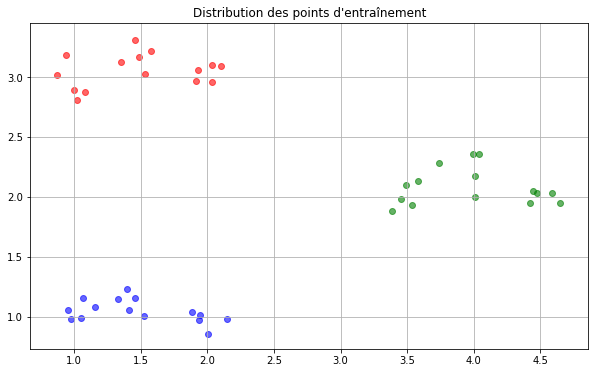

Epoch 0, Erreur moyenne: 0.2806
Epoch 100, Erreur moyenne: 0.0185
Epoch 200, Erreur moyenne: 0.0092
Epoch 300, Erreur moyenne: 0.0061
Epoch 400, Erreur moyenne: 0.0046
Epoch 500, Erreur moyenne: 0.0036
Epoch 600, Erreur moyenne: 0.0030
Epoch 700, Erreur moyenne: 0.0026
Epoch 800, Erreur moyenne: 0.0023
Epoch 900, Erreur moyenne: 0.0020


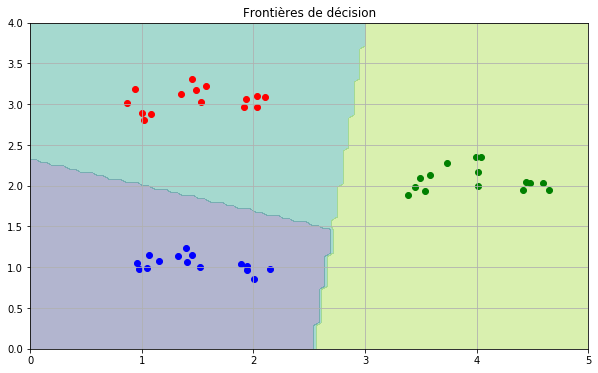

In [2]:
# Exemple d'utilisation étape par étape
# 1. Générer les données
points = blue_points + red_points + green_points
targets = [(0, 0)] * len(blue_points) + [(1, 0)] * len(red_points) + [(1, 1)] * len(green_points)

# 2. Visualiser les données initiales
plot_points()

# 3. Entraîner le modèle
W1, W2, errors = train_perceptrons(points, targets)

# 4. Visualiser les résultats
plot_decision_boundary(W1, W2)